In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Button, HBox, VBox, Output

# Puntos fijos
p1 = (5.4, 3.2)
p3 = (12.3, -3.6)

# Parámetros iniciales
x2_default = 9.5
y2_default = 0.7

# Sliders
slider_x2 = FloatSlider(value=x2_default, min=6, max=12, step=0.1, description='x2')
slider_y2 = FloatSlider(value=y2_default, min=-5, max=5, step=0.1, description='y2')

# Botón de reset
reset_button = Button(description='Resetear', button_style='warning')

# Output donde se mostrará la gráfica
out = Output()

# Función para interpolar
def interpolar_parabola(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    A = np.array([
        [x1**2, x1, 1],
        [x2**2, x2, 1],
        [x3**2, x3, 1]
    ])
    b = np.array([y1, y2, y3])
    coef = np.linalg.solve(A, b)
    return coef

# Función de graficado
def graficar_parabola(x2, y2):
    with out:
        out.clear_output(wait=True)
        p2 = (x2, y2)
        coef = interpolar_parabola(p1, p2, p3)
        a, b, c = coef

        xs = np.linspace(4, 14, 500)
        ys = a * xs**2 + b * xs + c

        plt.figure(figsize=(9, 5))
        plt.plot(xs, ys, label='Parábola interpolada', color='blue')
        plt.plot(*p1, 'ro')
        plt.plot(*p2, 'go')
        plt.plot(*p3, 'ro')

        # Etiquetas con coordenadas
        plt.text(p1[0] + 0.1, p1[1] + 0.2, f"p1 ({p1[0]:.1f}, {p1[1]:.1f})", color='red', fontsize=10)
        plt.text(p2[0] + 0.1, p2[1] + 0.2, f"p2 ({p2[0]:.1f}, {p2[1]:.1f})", color='green', fontsize=10)
        plt.text(p3[0] + 0.1, p3[1] + 0.2, f"p3 ({p3[0]:.1f}, {p3[1]:.1f})", color='red', fontsize=10)

        plt.xlim(4, 14)
        plt.ylim(-6, 6)
        plt.grid(True)
        plt.legend()
        plt.title("Interpolación de parábola con punto movible (p2)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

# Función que conecta sliders con gráfico
def update_plot(change=None):
    graficar_parabola(slider_x2.value, slider_y2.value)

# Función para resetear sliders
def reset_sliders(b):
    slider_x2.value = x2_default
    slider_y2.value = y2_default

# Eventos
slider_x2.observe(update_plot, names='value')
slider_y2.observe(update_plot, names='value')
reset_button.on_click(reset_sliders)

# Mostrar interfaz
graficar_parabola(x2_default, y2_default)  # inicializar
ui = VBox([HBox([slider_x2, slider_y2, reset_button]), out])
display(ui)


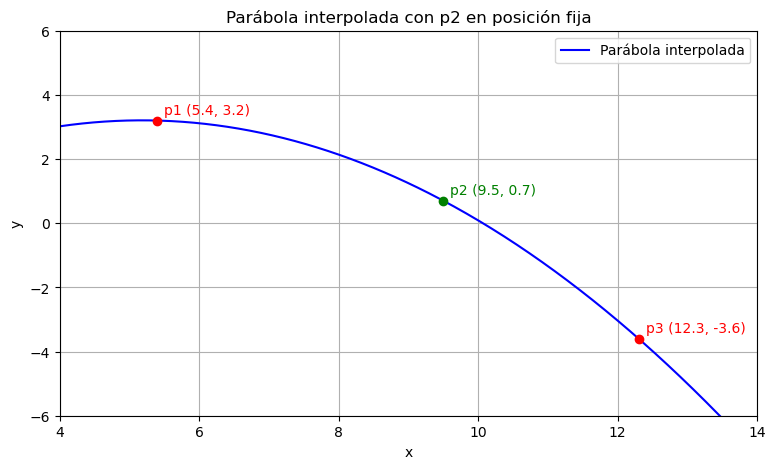

In [4]:
# Valores fijos de p2 para la imagen estática
x2_est = 9.5
y2_est = 0.7
p2_est = (x2_est, y2_est)

# Calcular coeficientes
coef = interpolar_parabola(p1, p2_est, p3)
a, b, c = coef

# Rango para dibujar la parábola
xs = np.linspace(4, 14, 500)
ys = a * xs**2 + b * xs + c

# Graficar
plt.figure(figsize=(9, 5))
plt.plot(xs, ys, label='Parábola interpolada', color='blue')
plt.plot(*p1, 'ro')
plt.plot(*p2_est, 'go')
plt.plot(*p3, 'ro')

# Etiquetas con coordenadas
plt.text(p1[0] + 0.1, p1[1] + 0.2, f"p1 ({p1[0]:.1f}, {p1[1]:.1f})", color='red', fontsize=10)
plt.text(p2_est[0] + 0.1, p2_est[1] + 0.2, f"p2 ({p2_est[0]:.1f}, {p2_est[1]:.1f})", color='green', fontsize=10)
plt.text(p3[0] + 0.1, p3[1] + 0.2, f"p3 ({p3[0]:.1f}, {p3[1]:.1f})", color='red', fontsize=10)

# Detalles de la gráfica
plt.xlim(4, 14)
plt.ylim(-6, 6)
plt.grid(True)
plt.legend()
plt.title("Parábola interpolada con p2 en posición fija")
plt.xlabel("x")
plt.ylabel("y")

# Guardar y mostrar imagen
plt.savefig("parabola_estatica.png", dpi=300)
plt.show()
